In [1]:
import math
import random
from collections.abc import Iterable, MutableMapping
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import sortedcontainers
from pandas.io.formats.style import Styler

import pysorteddict

sorted_dict_lens = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]
sorted_dict_types = [pysorteddict.SortedDict]


def setup(sorted_dict_type: type, sorted_dict_len: int, seed: float = math.pi) -> MutableMapping:
    random.seed(seed)
    d = sorted_dict_type()
    for _ in range(sorted_dict_len):
        d[random.random()] = random.random()
    return d


def plot(stylers: Iterable[Styler], *, alpha: float = 0.7, logy: bool = False, name: str = "", yunit: str = "s"):
    for theme in ["light", "dark"]:
        with plt.style.context(f"{theme}.mplstyle", after_reset=True):
            fig, ax = plt.subplots()
            for styler, marker, loc in zip(stylers, ["D", "s"], ["upper left", "upper center"], strict=False):
                ax_lines_len = len(ax.lines)
                ax.set_prop_cycle(None)
                styler.data.plot(
                    alpha=alpha,
                    ax=ax,
                    logx=True,
                    logy=logy,
                    marker=marker,
                    xlabel="Sorted Dictionary Length",
                    xlim=(sorted_dict_lens[0] // 10, sorted_dict_lens[-1] * 10),
                    ylabel="Average Execution Time",
                )
                # Create a separate legend for these lines.
                font_prop = {"family": "JetBrains Mono"}
                ax.add_artist(
                    ax.legend(
                        handles=ax.lines[ax_lines_len:], loc=loc, prop=font_prop, title=styler.caption, title_fontproperties=font_prop,
                    ),
                )
            # Legends have been added manually. Remove the automatically added one.
            ax.get_legend().remove()
            ax.grid(which="major", linewidth=0.5, linestyle=":")
            ax.grid(which="minor", axis="y", linewidth=0.0625, linestyle="-")
            ax.minorticks_on()
            # The warning about setting labels without setting ticks can be ignored because the plot isn't interactive.
            ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())
            plt.show()
            fig.savefig(Path().resolve().parents[1] / "docs" / "_static" / "images" / f"perf-{name}-{theme}.svg")

# `contains`

In [2]:
def bench_contains() -> Iterable[Styler]:
    for sorted_dict_type in sorted_dict_types:
        df = pd.DataFrame(index=sorted_dict_lens, columns=["0.00 in d", "0.33 in d", "0.67 in d", "1.00 in d"])
        for i, sorted_dict_len in enumerate(sorted_dict_lens):
            d = setup(sorted_dict_type, sorted_dict_len)
            for j, key in enumerate([0.00, 0.33, 0.67, 1.00]):
                %timeit -v bench key in d
                df.iat[i, j] = bench.average * 1e9
        yield df.style.set_caption(sorted_dict_type.__module__)


stylers = [*bench_contains()]

35 ns ± 0.0649 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


42.7 ns ± 0.287 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


38.9 ns ± 0.0772 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


29.6 ns ± 0.608 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


46.9 ns ± 0.0943 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


59.5 ns ± 0.106 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


55.8 ns ± 0.0931 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


57.8 ns ± 0.538 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


62 ns ± 0.153 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


67 ns ± 0.0844 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


67.3 ns ± 0.138 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


62.2 ns ± 0.62 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


80.6 ns ± 0.211 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


83.4 ns ± 0.11 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


76.3 ns ± 0.136 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


89.6 ns ± 0.309 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


91.4 ns ± 0.125 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


100 ns ± 0.0801 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


98.5 ns ± 0.133 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


90.5 ns ± 1.21 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


103 ns ± 0.193 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


114 ns ± 0.11 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


114 ns ± 0.0795 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


110 ns ± 0.368 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


,0.00 in d,0.33 in d,0.67 in d,1.00 in d
100,35.025335,42.736926,38.863752,29.595928
1000,46.869201,59.546186,55.828978,57.814931
10000,61.990611,67.023392,67.309319,62.217461
100000,80.590776,83.423439,76.268042,89.574136
1000000,91.439789,100.419079,98.451060,90.456733
10000000,102.818766,113.788949,113.938273,109.578042


/tmp/ipykernel_1962/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


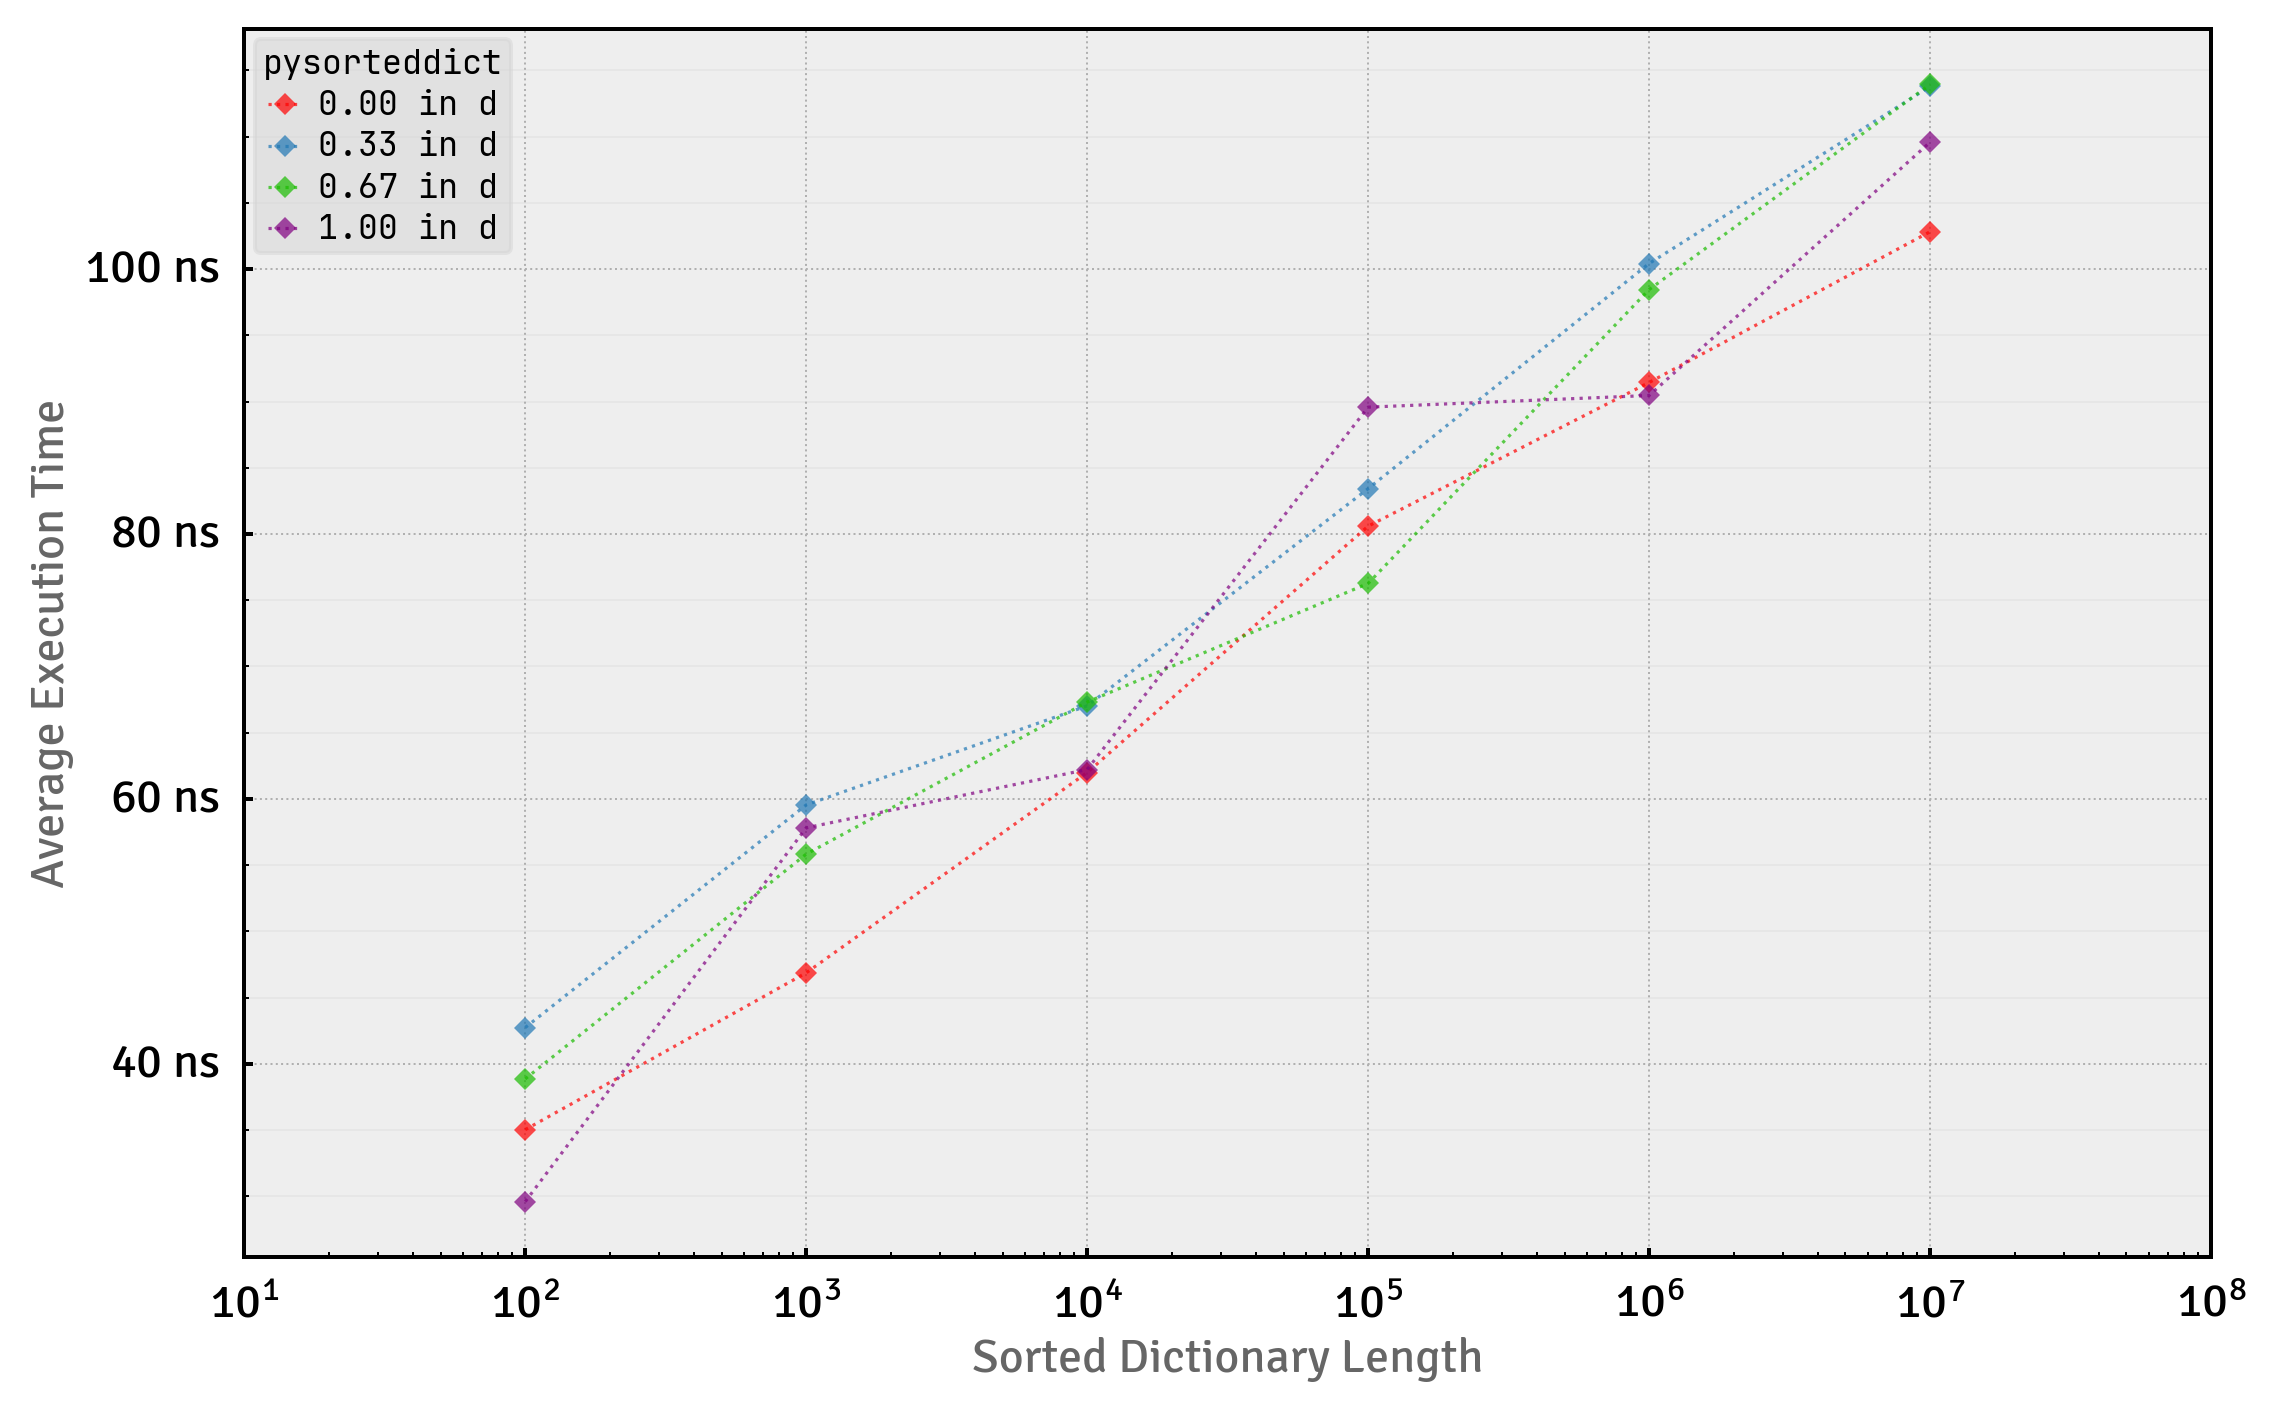

/tmp/ipykernel_1962/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


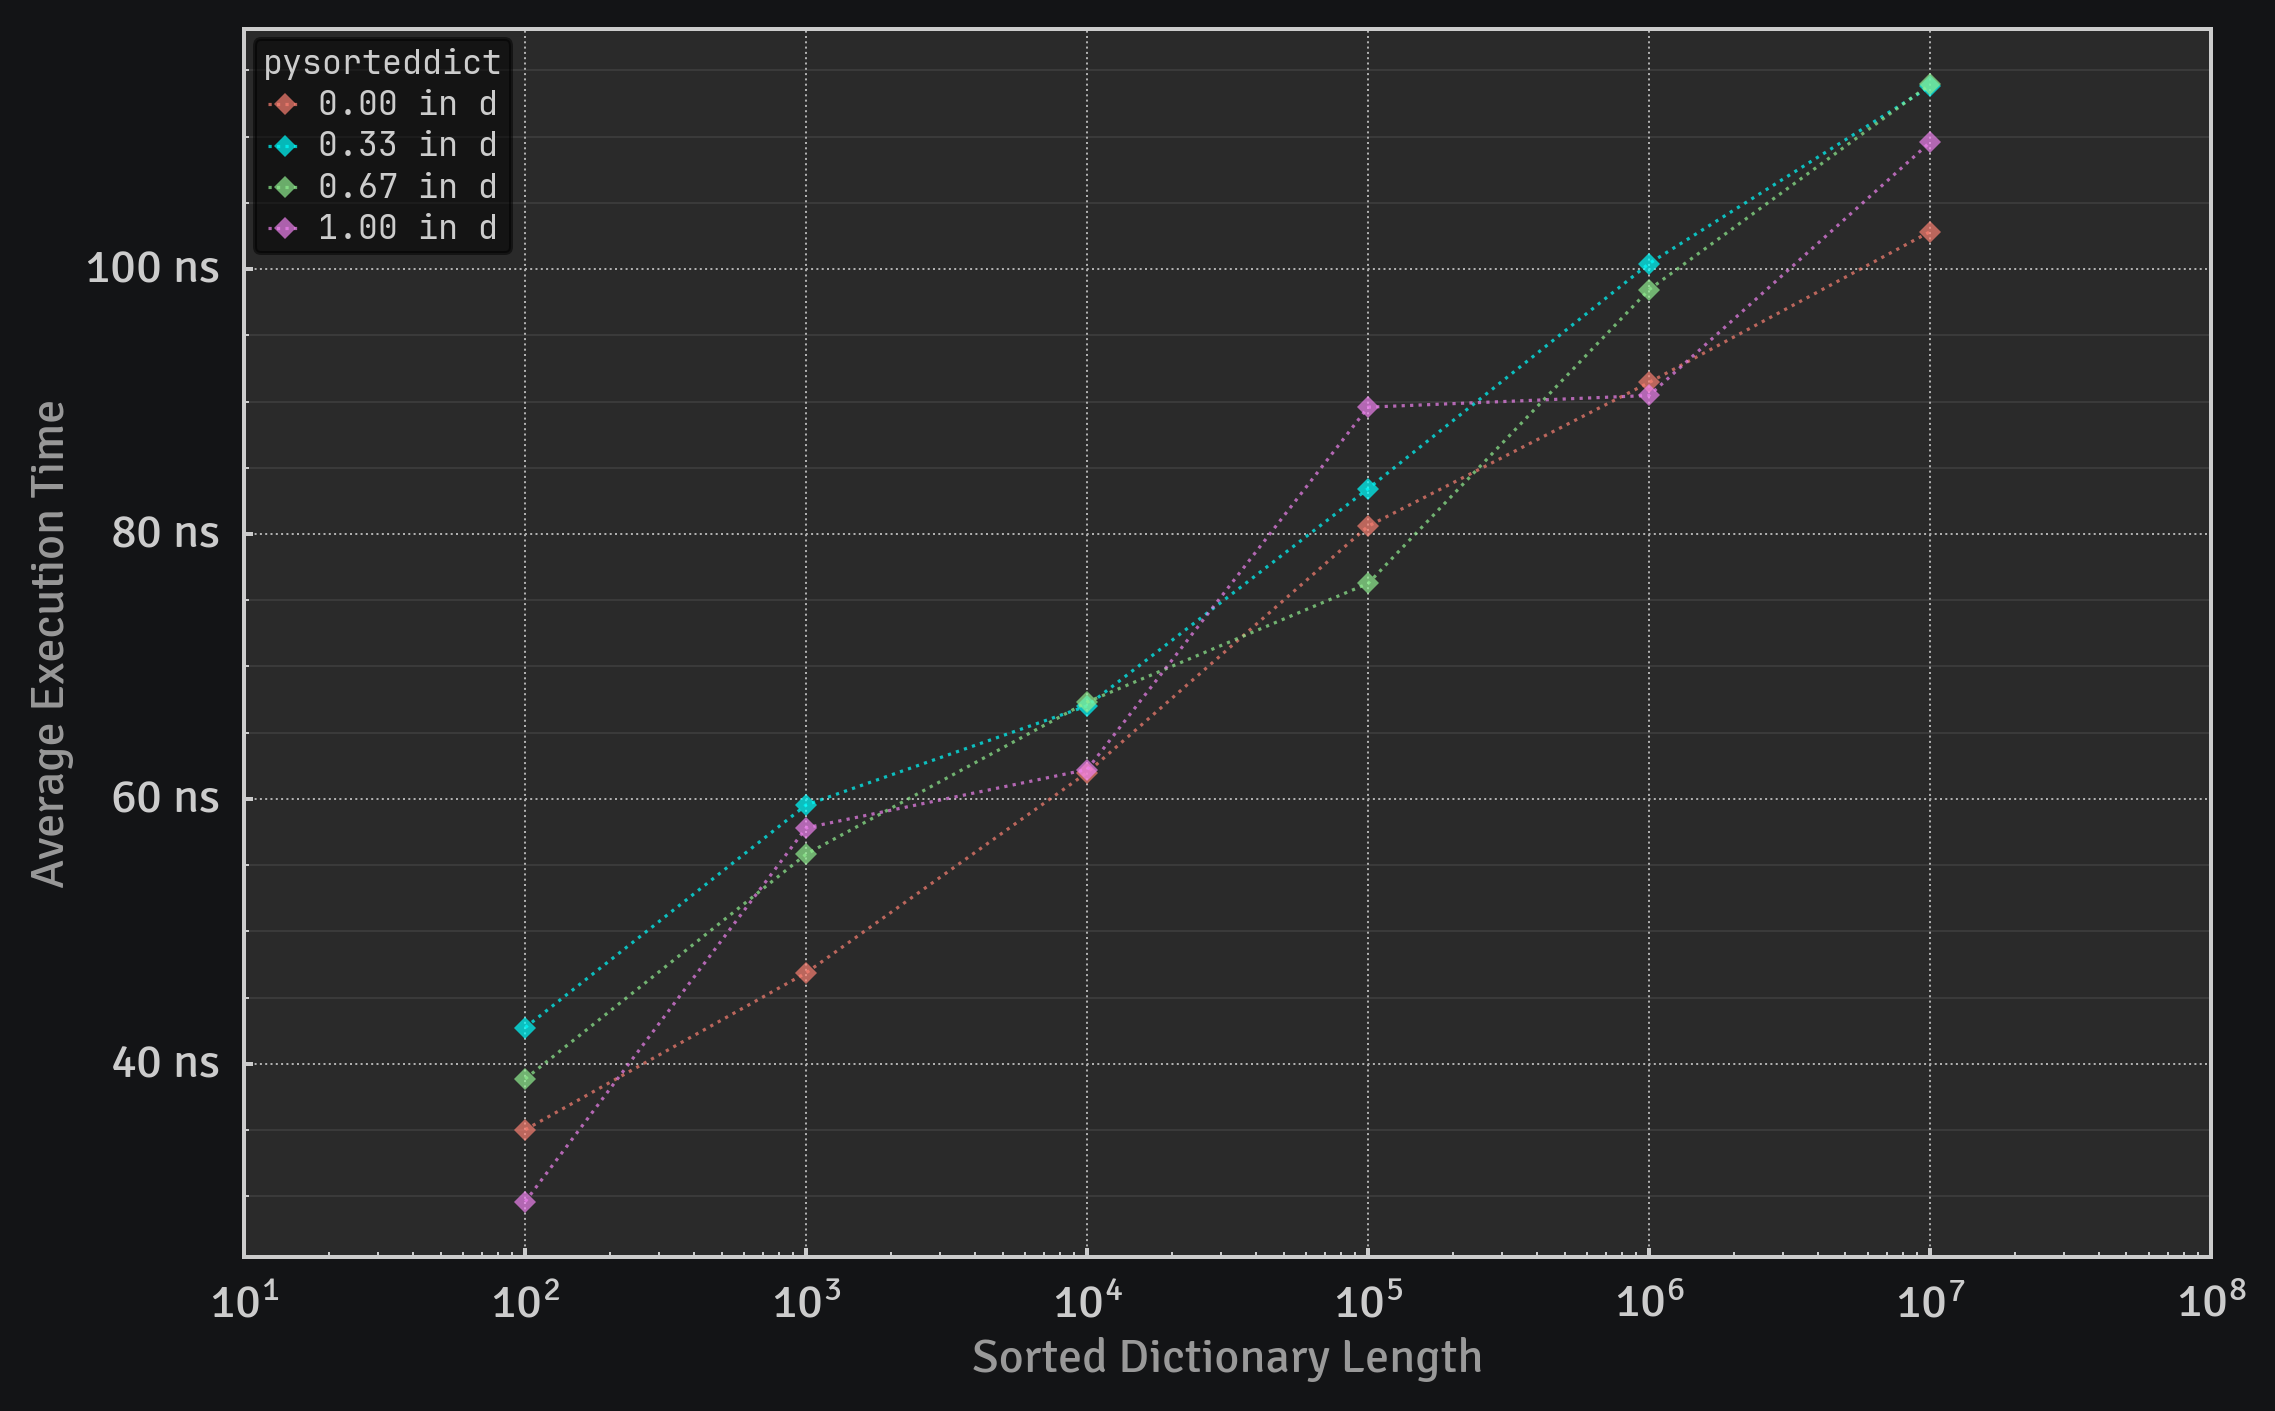

In [3]:
for styler in stylers:
    display(styler)
plot(stylers, name="contains", yunit="ns")

# `setitem`

In [4]:
def set_del(d: MutableMapping, keys: list[float]):
    for key in keys:
        d[key] = None
    for key in keys:
        del d[key]


def bench_setitem() -> Iterable[Styler]:
    keys_lens = [33, 67, 100]
    for sorted_dict_type in sorted_dict_types:
        df = pd.DataFrame(index=sorted_dict_lens, columns=[f"set_del(d, keys_{keys_len})" for keys_len in keys_lens])
        for i, sorted_dict_len in enumerate(sorted_dict_lens):
            for j, keys_len in enumerate(keys_lens):
                d = setup(sorted_dict_type, sorted_dict_len)
                keys = [random.random() for _ in range(keys_len)]
                %timeit -v bench set_del(d, keys)
                df.iat[i, j] = bench.average * 1e6
        yield df.style.set_caption(sorted_dict_type.__module__)


stylers = [*bench_setitem()]

3.91 μs ± 4.81 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


8.12 μs ± 17.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


12.3 μs ± 12 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


4.86 μs ± 11.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


9.87 μs ± 18.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


15.2 μs ± 47.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


5.79 μs ± 7.22 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


12 μs ± 55.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


20.9 μs ± 113 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


6.78 μs ± 6.22 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


15.2 μs ± 53.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


28.5 μs ± 64.6 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


7.82 μs ± 15.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


20.9 μs ± 139 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


41 μs ± 221 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


9.19 μs ± 30.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


29.6 μs ± 145 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


59.9 μs ± 109 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


,"set_del(d, keys_33)","set_del(d, keys_67)","set_del(d, keys_100)"
100,3.907315,8.119037,12.306164
1000,4.855971,9.869658,15.186807
10000,5.787922,12.030382,20.853740
100000,6.780511,15.189295,28.502690
1000000,7.816702,20.930297,41.045644
10000000,9.189083,29.551450,59.921589


/tmp/ipykernel_1962/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


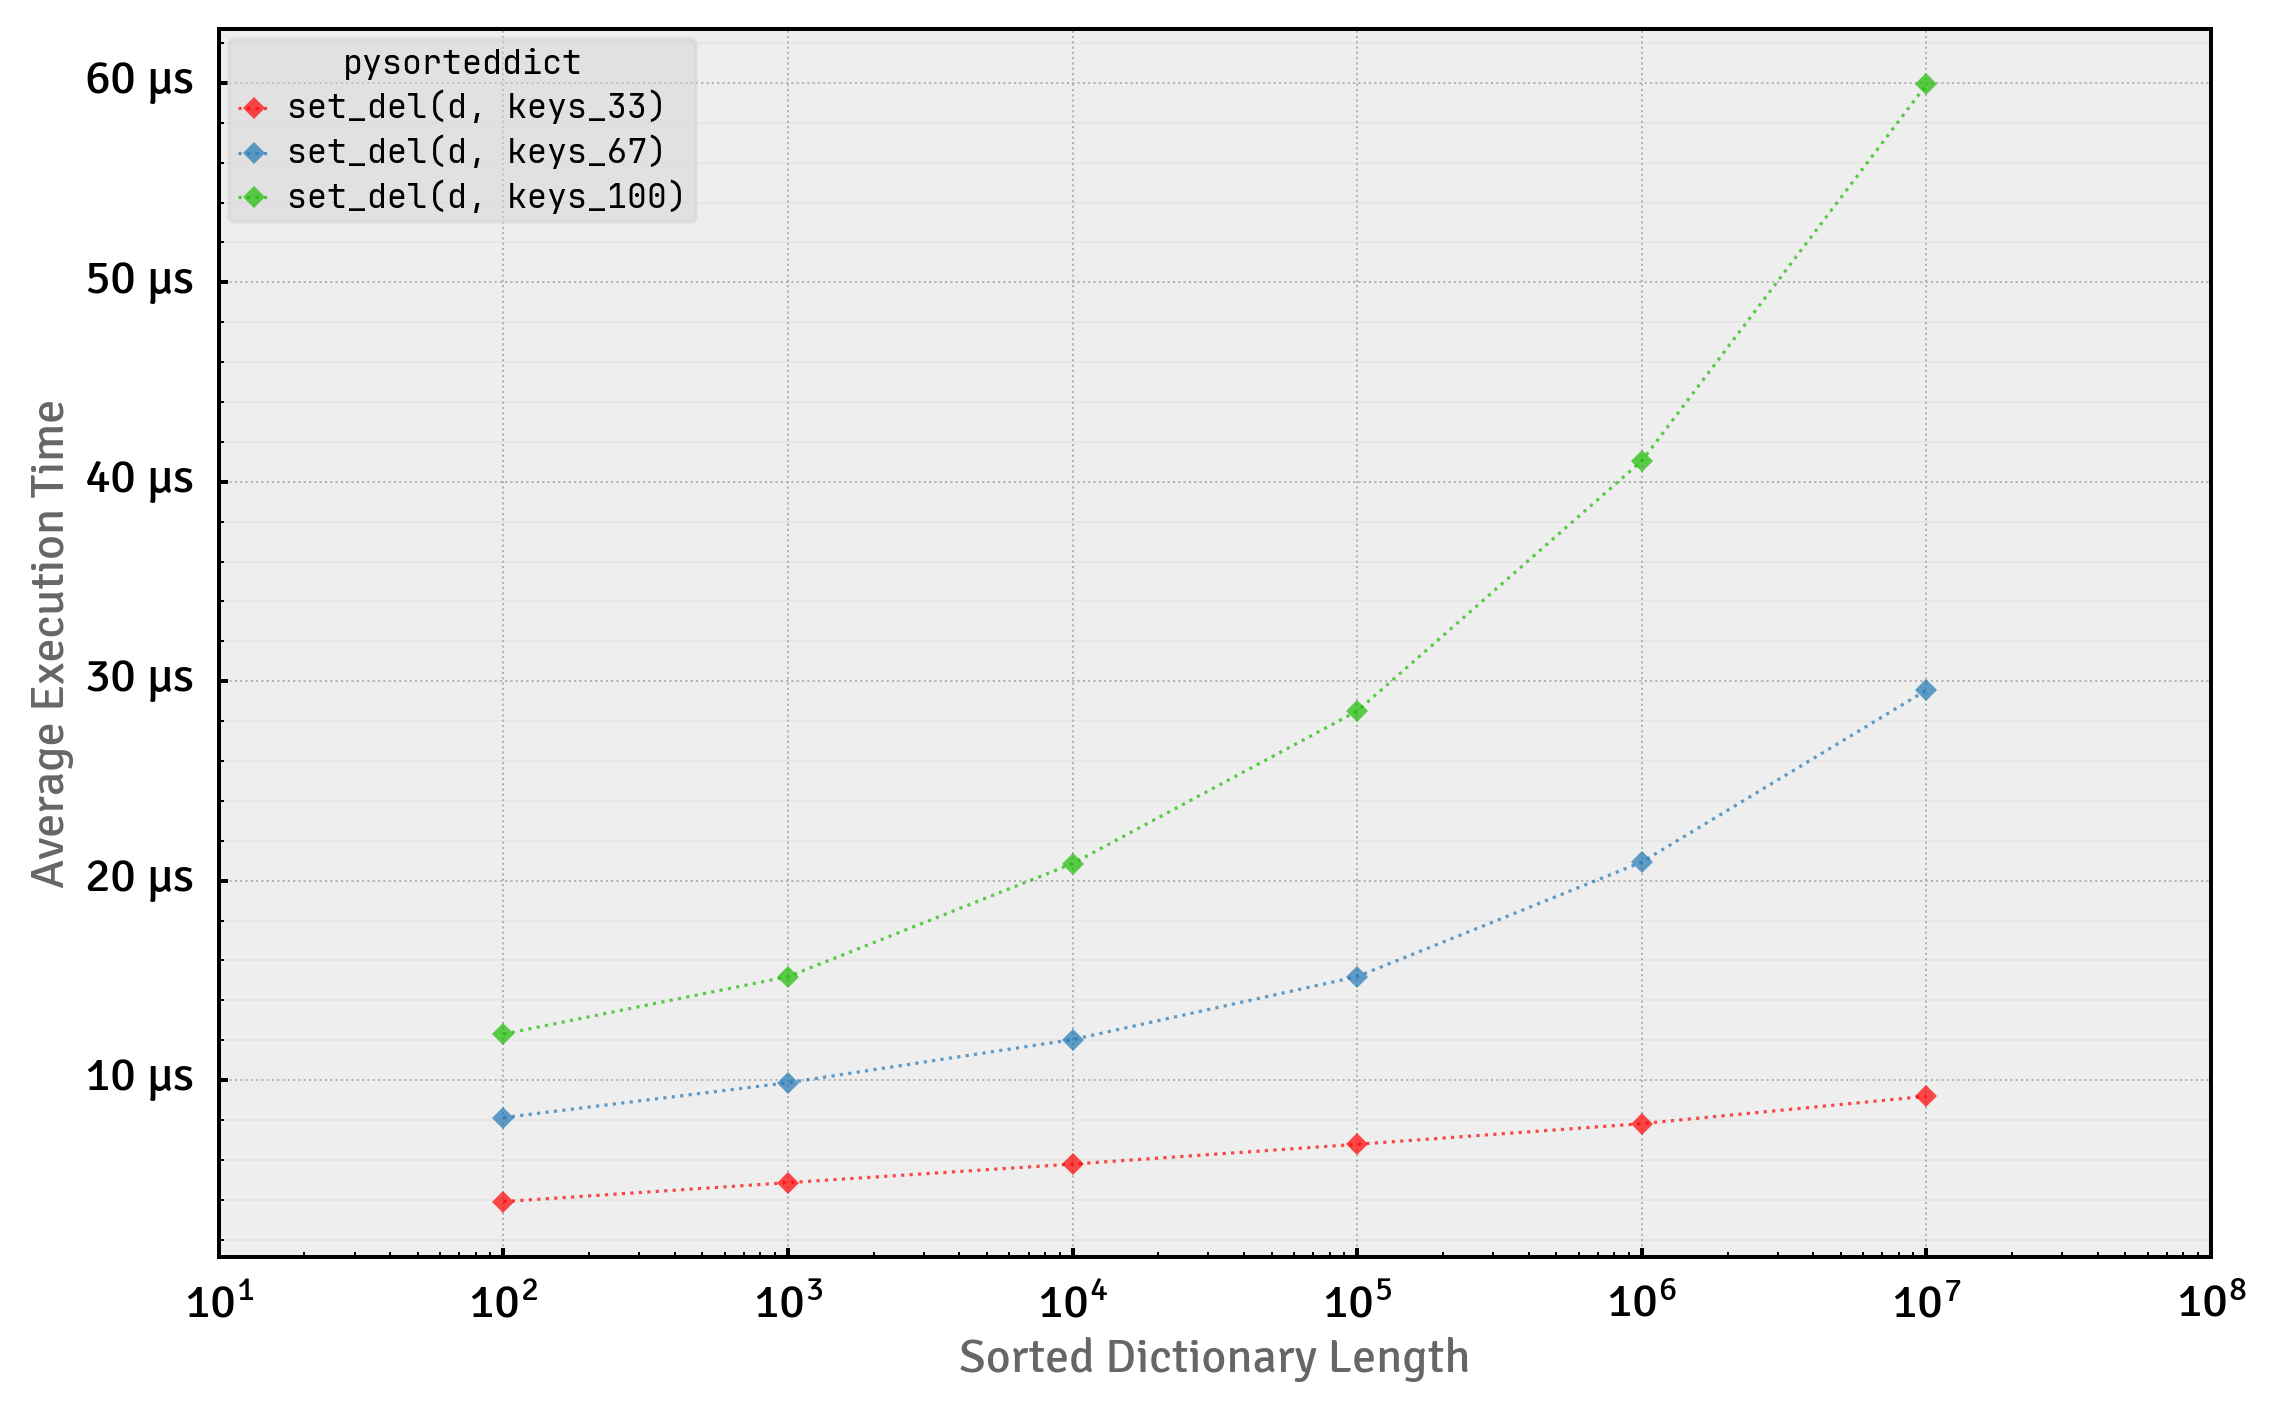

/tmp/ipykernel_1962/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


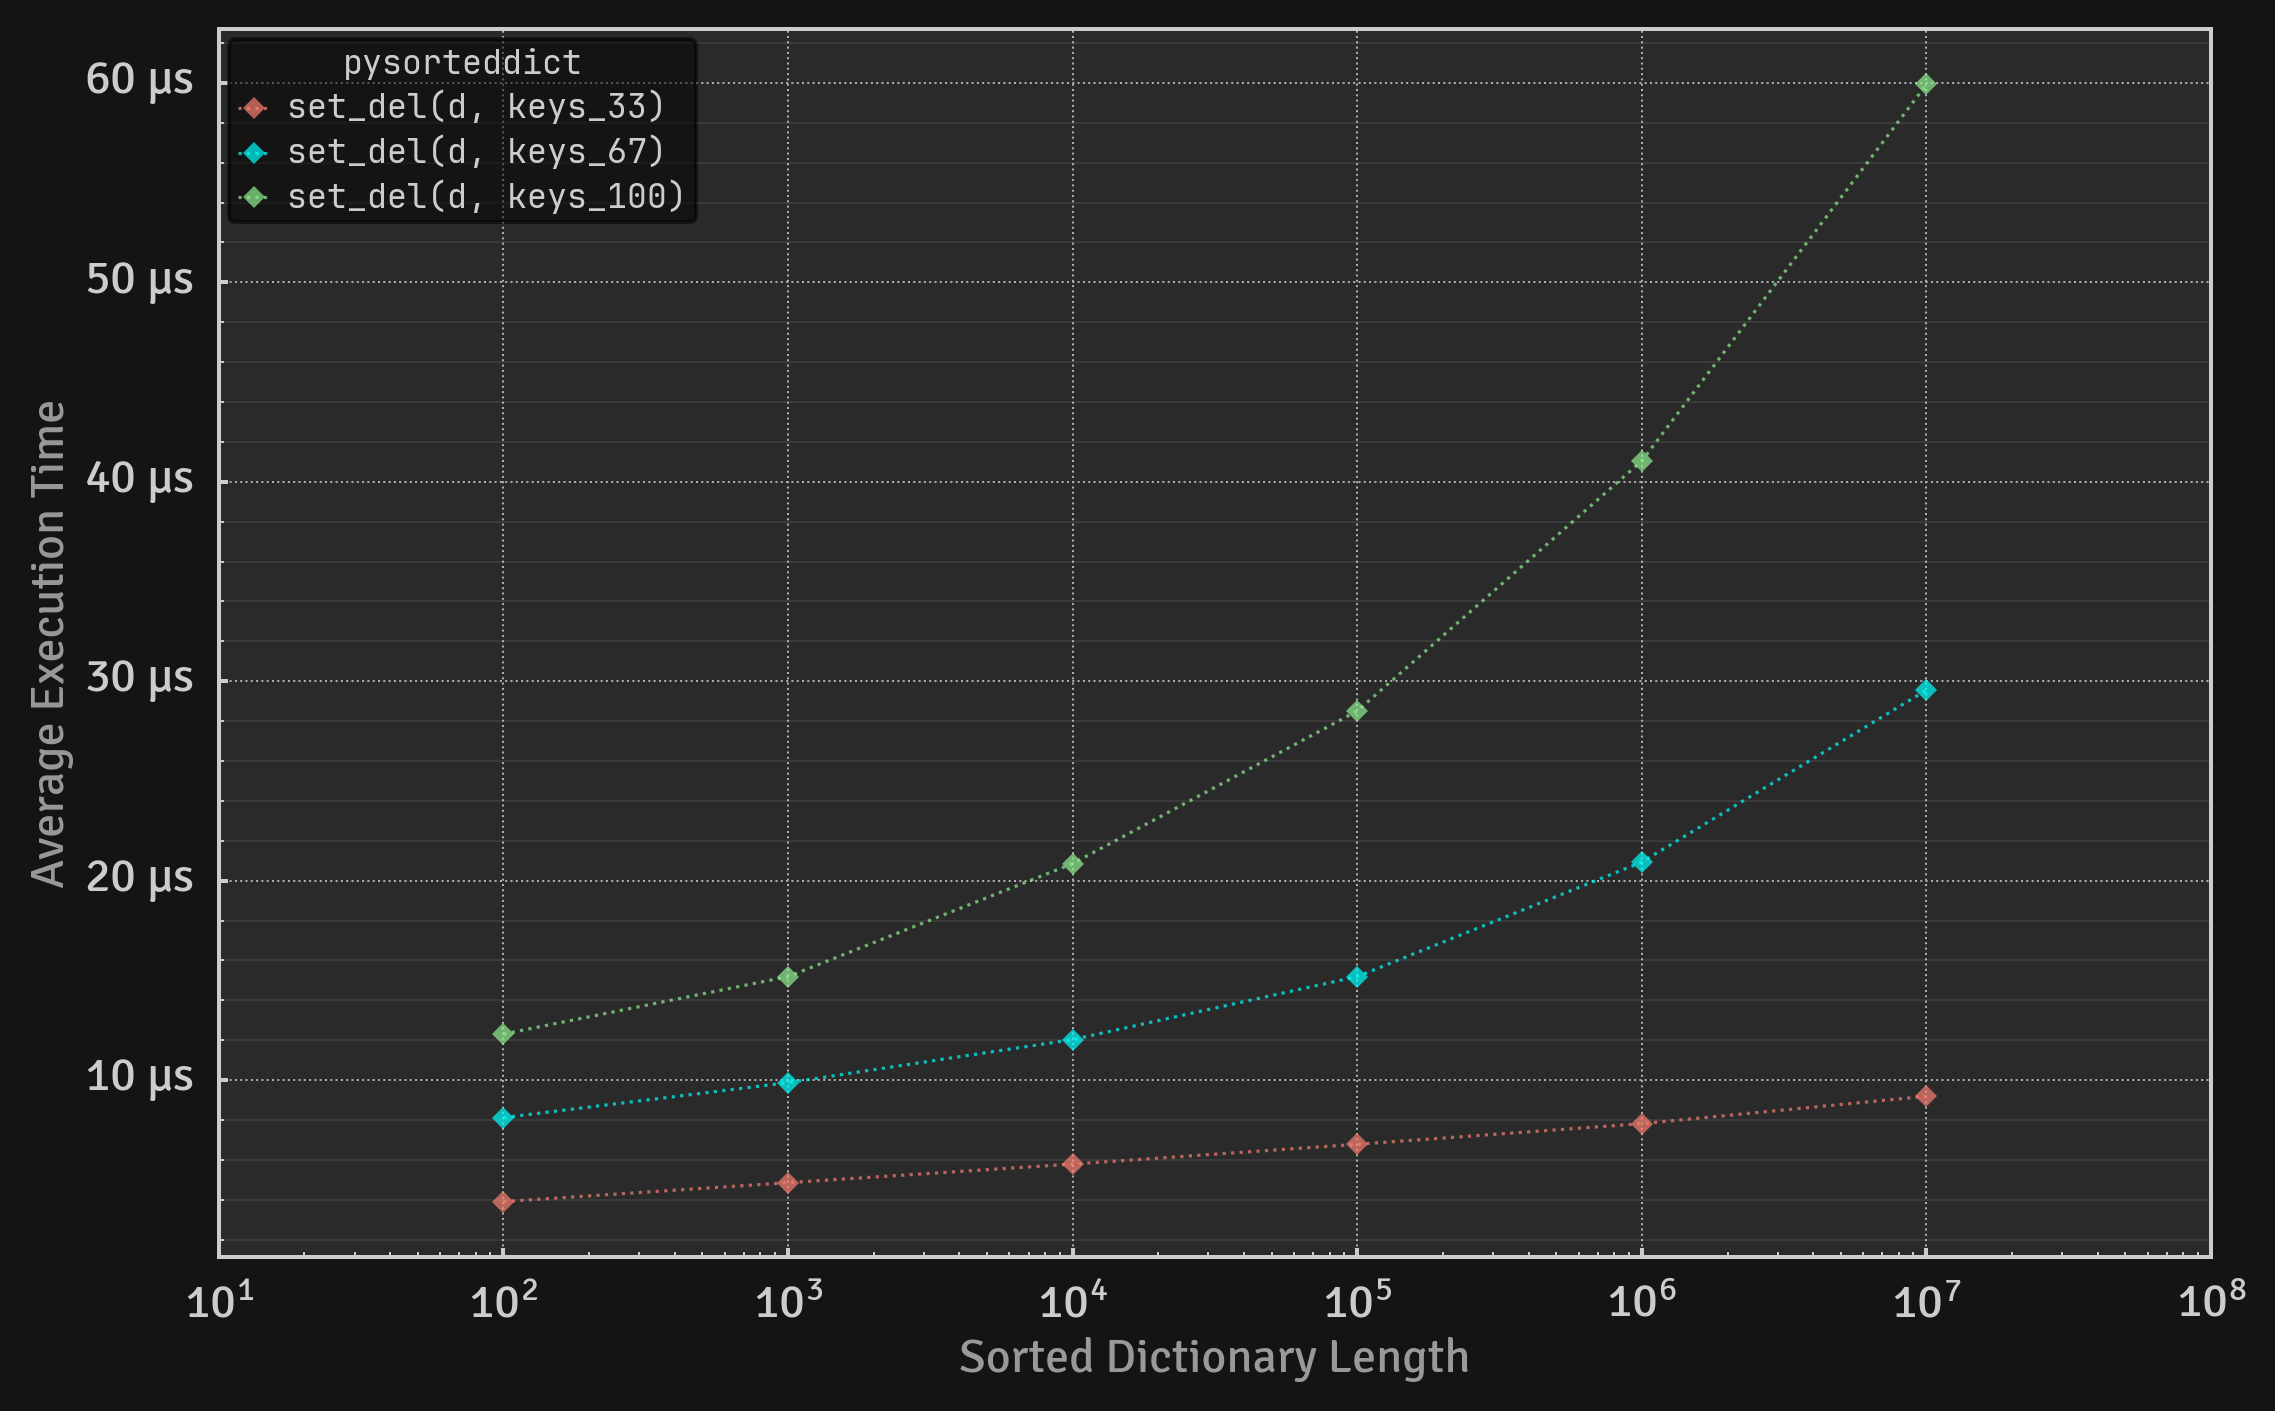

In [5]:
for styler in stylers:
    display(styler)
plot(stylers, name="setitem", yunit="μs")

# `iter`

In [6]:
def bench_iter() -> Iterable[Styler]:
    for sorted_dict_type in sorted_dict_types:
        df = pd.DataFrame(index=sorted_dict_lens, columns=["for _ in d: pass", "for _ in reversed(d): pass"])
        for i, sorted_dict_len in enumerate(sorted_dict_lens):
            d = setup(sorted_dict_type, sorted_dict_len)
            %timeit -v bench for _ in d: pass
            df.iat[i, 0] = bench.average
            %timeit -v bench for _ in reversed(d): pass
            df.iat[i, 1] = bench.average
        yield df.style.set_caption(sorted_dict_type.__module__)


stylers = [*bench_iter()]

664 ns ± 1.04 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


953 ns ± 3.28 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


6.63 μs ± 21.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


9.43 μs ± 48.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


114 μs ± 318 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


138 μs ± 283 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


2.35 ms ± 5.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


2.56 ms ± 2.94 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


106 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


108 ms ± 105 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


1.21 s ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


1.24 s ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


,for _ in d: pass,for _ in reversed(d): pass
100,0.000001,0.000001
1000,0.000007,0.000009
10000,0.000114,0.000138
100000,0.002354,0.002559
1000000,0.105729,0.108483
10000000,1.206299,1.235173


/tmp/ipykernel_1962/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


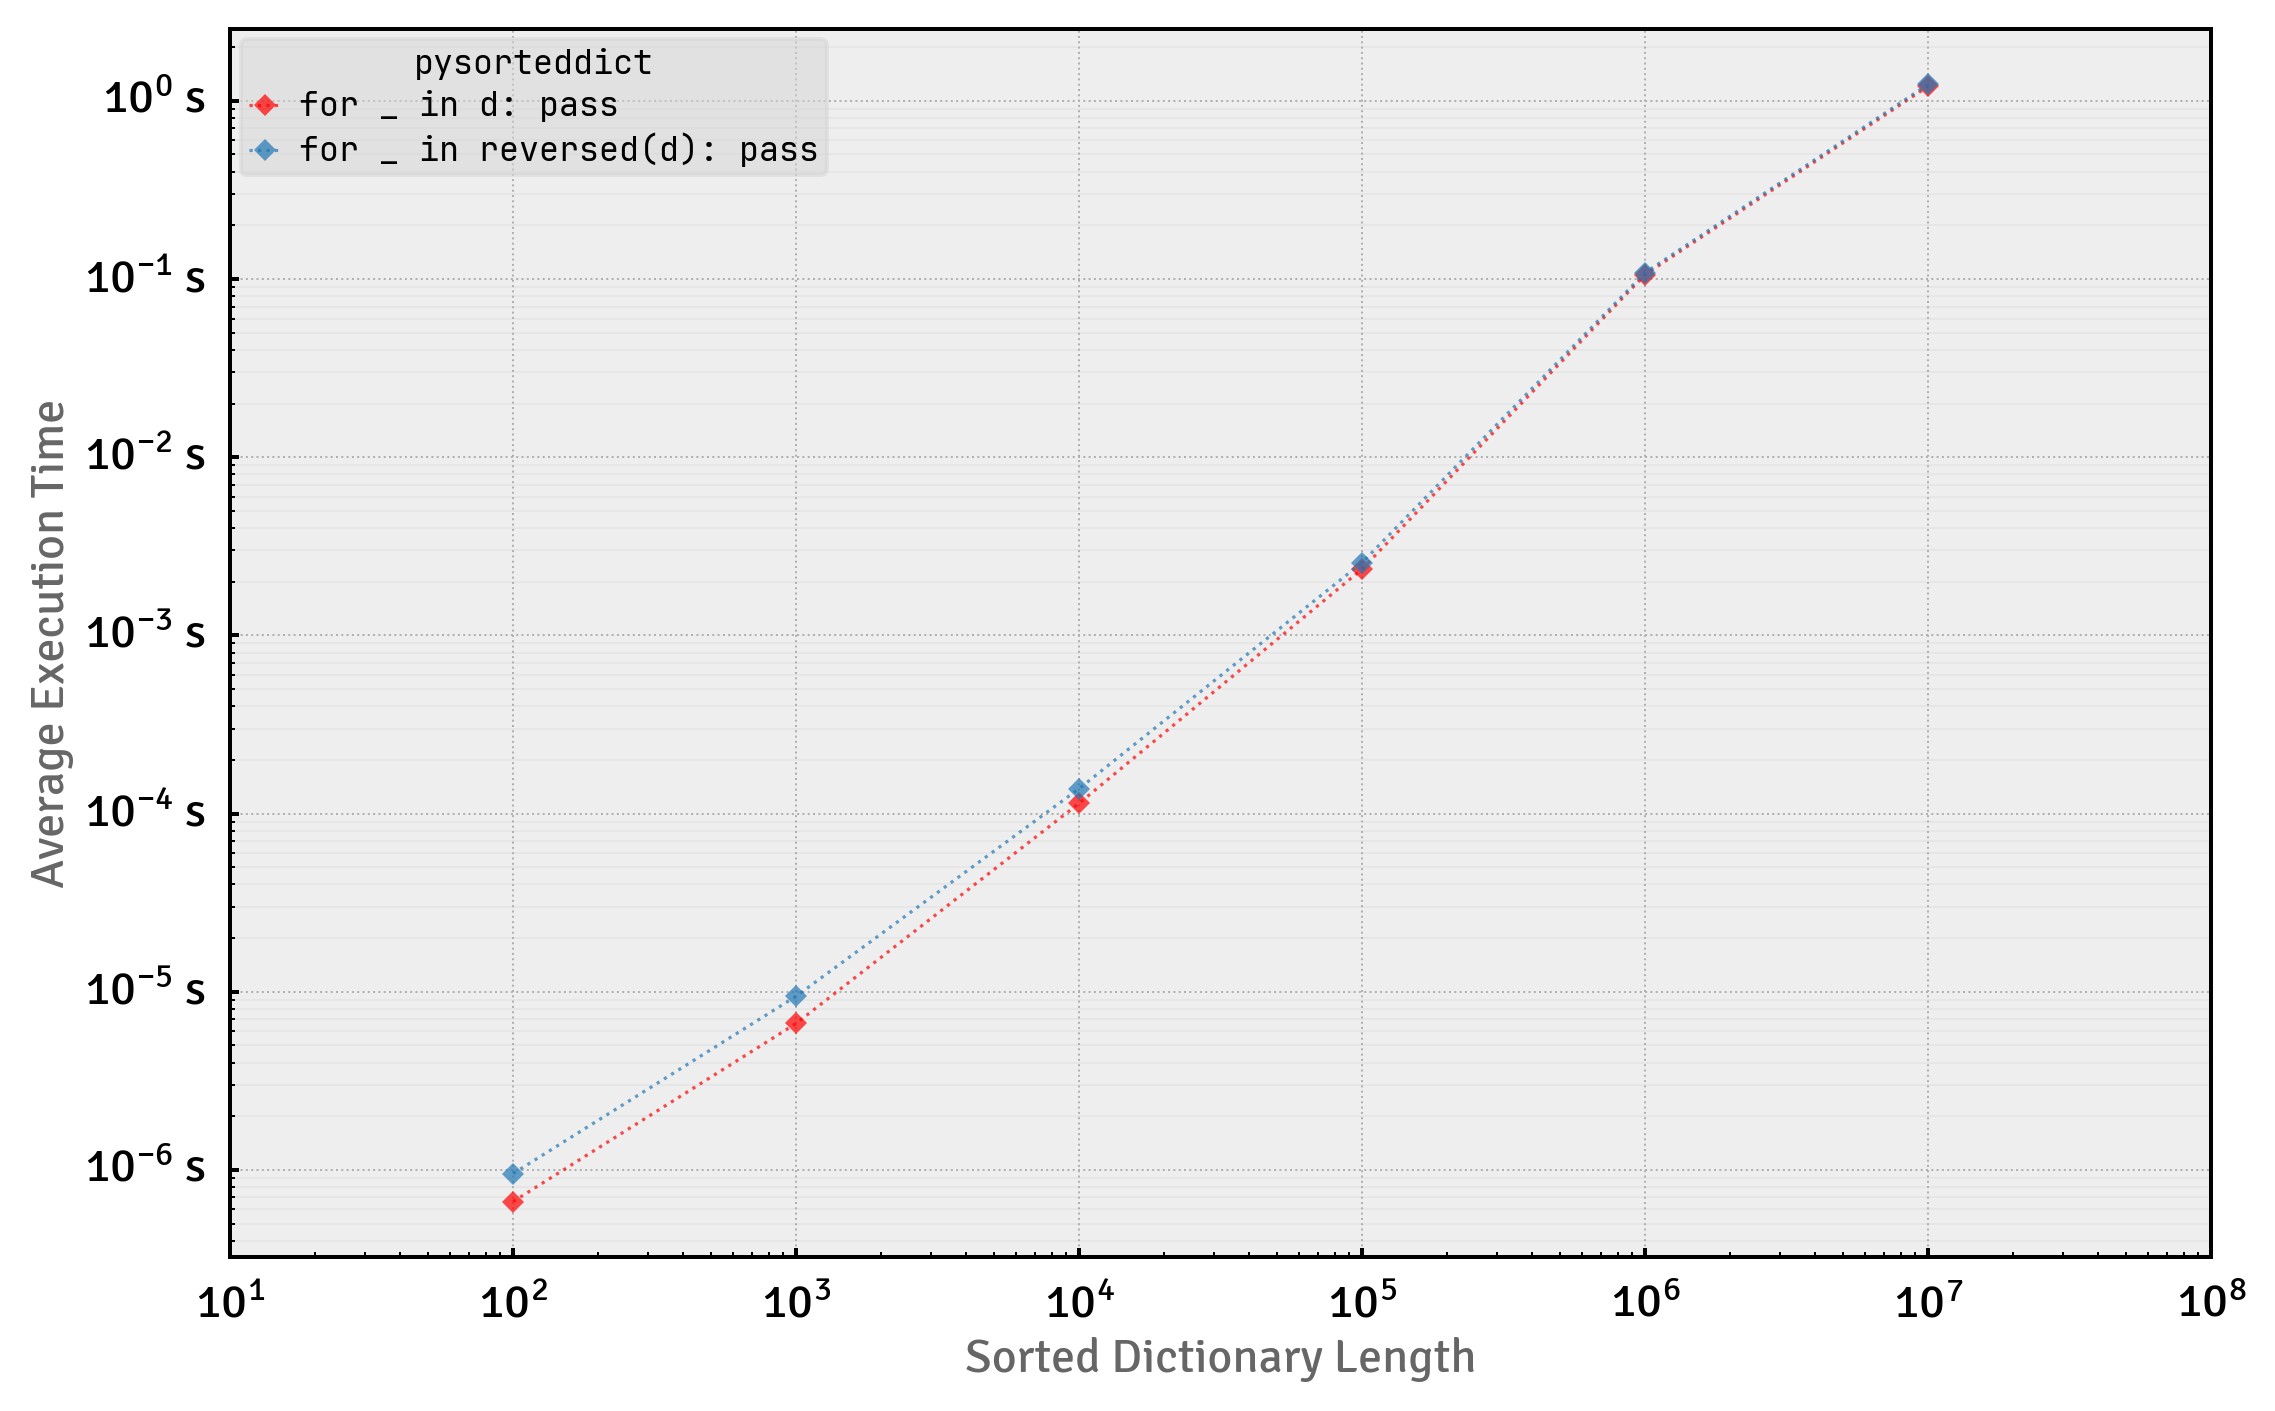

/tmp/ipykernel_1962/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


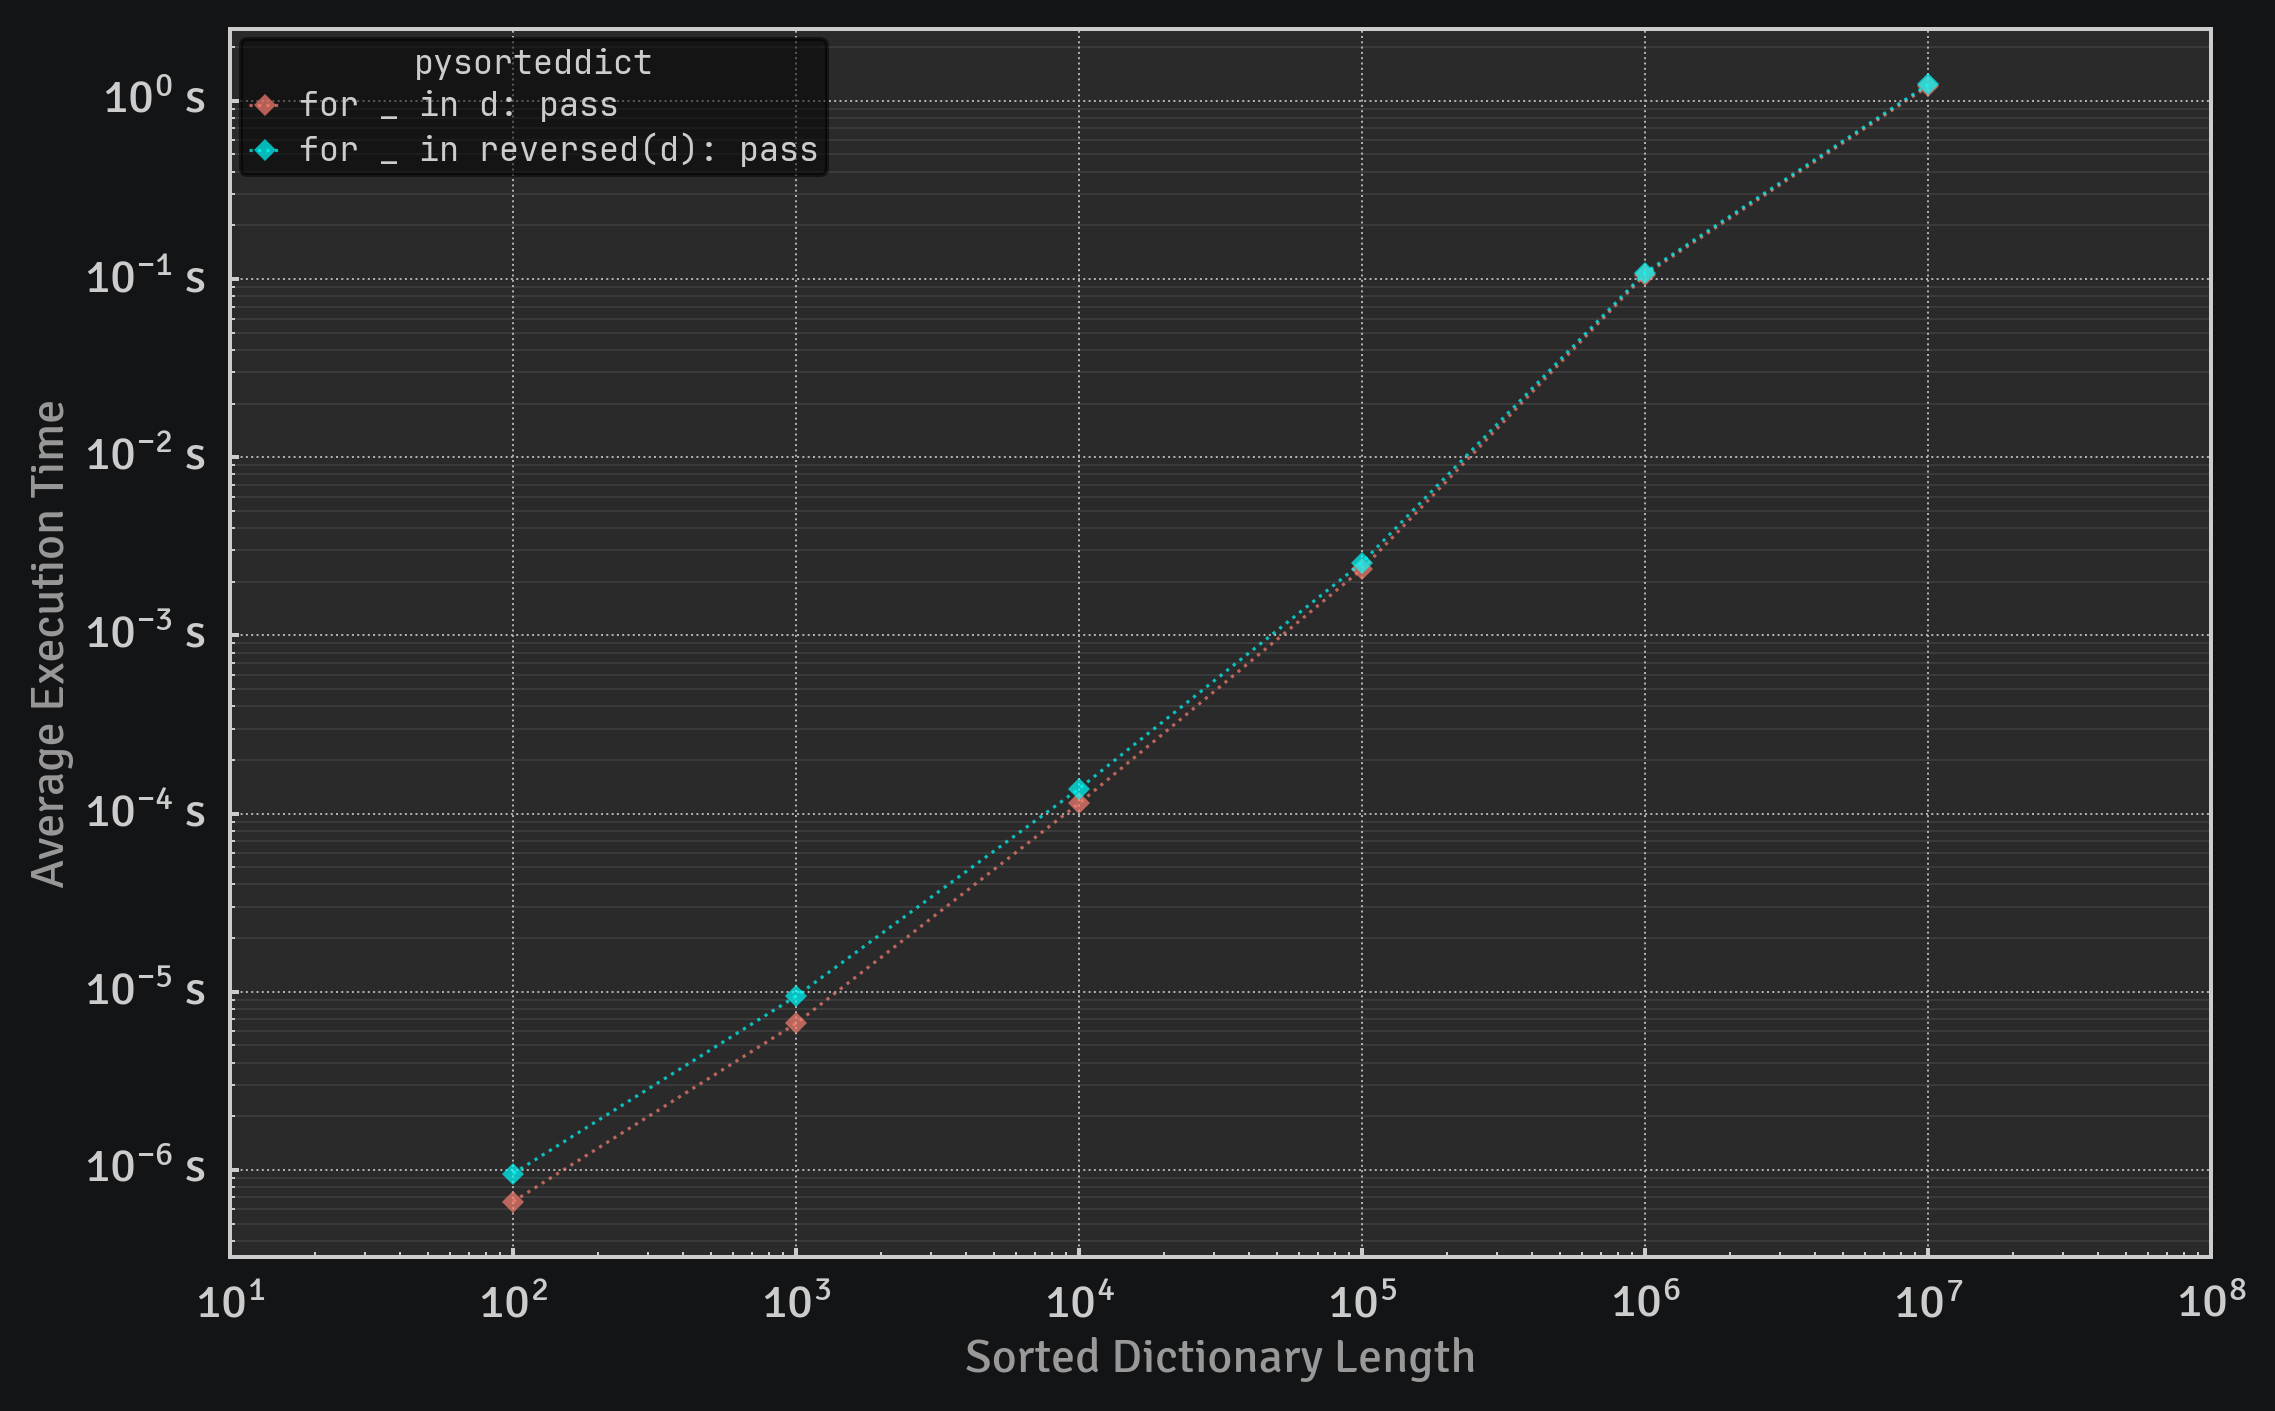

In [7]:
for styler in stylers:
    display(styler)
plot(stylers, logy=True, name="iter")